<a href="https://colab.research.google.com/github/CheimaHMM/time-series/blob/main/stock_market_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Imports**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.optimizers import Adam

In [ ]:
import statsmodels.api as sm
from pmdarima import auto_arima
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

## **Data preprocessing**

In [ ]:
df =pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
df =pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
df=df.iloc[::-1]
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [ ]:
df_high=df.reset_index()['High']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df_high = scaler.fit_transform(np.array(df_high).reshape(-1,1))

In [ ]:
training_size = int(len(df_high) * 0.75)
test_size = len(df_high) - training_size
train_data,test_data = df_high[0:training_size,:], df_high[training_size:len(df_high),:1]

In [ ]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 1
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [ ]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

## **Modeling**

**LSTM**

In [ ]:
model = Sequential()
model.add(LSTM(50, input_shape = (1,1), return_sequences = False))
model.add(Dense(1, activation='relu'))
model.compile(loss = 'mean_squared_error', optimizer = Adam(learning_rate=0.01))

In [ ]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10, batch_size = 64)

Epoch 1/10
24/24 [==============================] - 3s 20ms/step - loss: 0.0111 - val_loss: 0.0902
Epoch 2/10
24/24 [==============================] - 0s 5ms/step - loss: 0.0031 - val_loss: 0.0162
Epoch 3/10
24/24 [==============================] - 0s 4ms/step - loss: 5.1639e-04 - val_loss: 0.0033
Epoch 4/10
24/24 [==============================] - 0s 4ms/step - loss: 1.2745e-04 - val_loss: 0.0031
Epoch 5/10
24/24 [==============================] - 0s 4ms/step - loss: 1.1100e-04 - val_loss: 0.0021
Epoch 6/10
24/24 [==============================] - 0s 4ms/step - loss: 1.1183e-04 - val_loss: 0.0023
Epoch 7/10
24/24 [==============================] - 0s 4ms/step - loss: 1.0695e-04 - val_loss: 0.0022
Epoch 8/10
24/24 [==============================] - 0s 4ms/step - loss: 1.0876e-04 - val_loss: 0.0018
Epoch 9/10
24/24 [==============================] - 0s 4ms/step - loss: 1.0685e-04 - val_loss: 0.0020
Epoch 10/10
24/24 [==============================] - 0s 3ms/step - loss: 1.0680e-04 - val

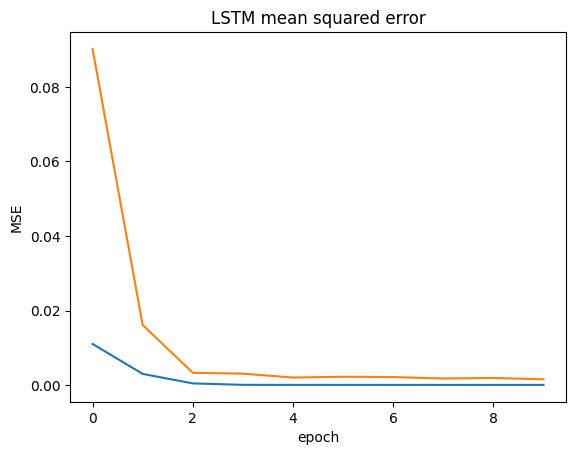

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.title('LSTM mean squared error')
plt.show()

**`plotting the LSTM forecast`**

In [ ]:
LSTM_forecast = []
for value in train_data[1:] :
  value = np.reshape(value,(1,1))
  pred_value = model.predict(value)
  pred_value = pred_value[0][0]
  LSTM_forecast.append(pred_value)

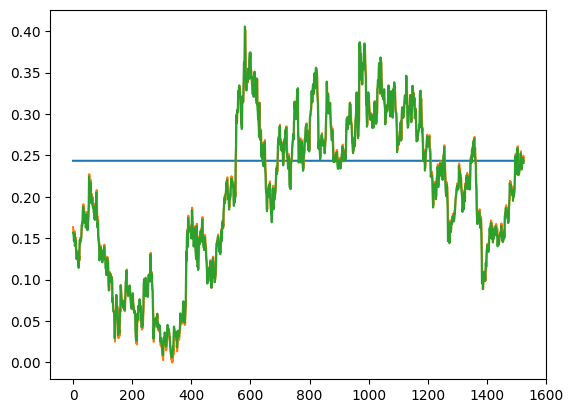

In [ ]:
plt.plot(forecast)
plt.plot(train_data)
plt.plot(LSTM_forecast)
plt.show()

**ARIMA**

`**Visualizing autocorrelation and partial autocorrelation in order to search for optimal hyperparameters (p and q) for the ARIMA model**`

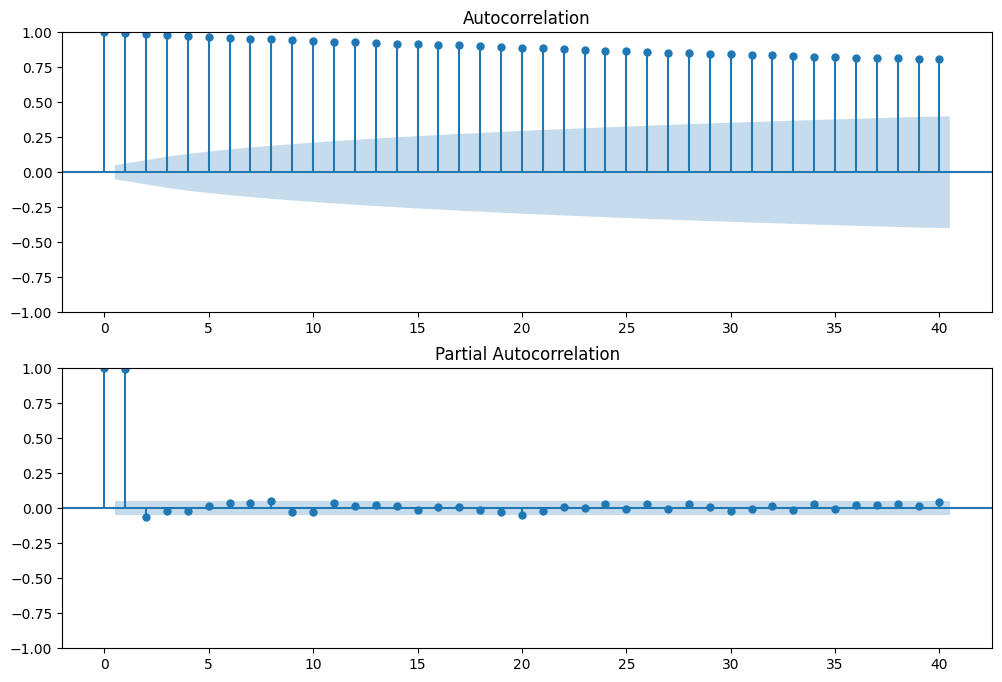

In [ ]:
# Tracer l'ACF et le PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
# ACF
plot_acf(train_data, lags=40, ax=ax1)
# PACF
plot_pacf(train_data, lags=40, ax=ax2)
plt.show()

**`optimapl p and q are : p = q = 1`**

In [ ]:
p = 0  # AutoRegressive order
d = 1  # Differencing order
q = 0  # Moving Average order

model_ARIMA = sm.tsa.ARIMA(train_data, order=(p, d, q))
results = model_ARIMA.fit()

In [ ]:
# mean-squared-error for ARIMA
MSE_ARIMA = mean_squared_error(train_data[1:],forecast)
print('ARIMA mse : ', MSE_ARIMA)

In [ ]:
forecast_steps = len(train_data) - 1
forecast = results.forecast(steps=forecast_steps)
results.forecast(steps=len(test_data)-1)

**Auto-ARIMA for automatical hyperparameters searching**

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-3237.247, Time=1.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3243.037, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-3242.174, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3242.243, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-3245.020, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-3240.496, Time=0.95 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 3.032 seconds


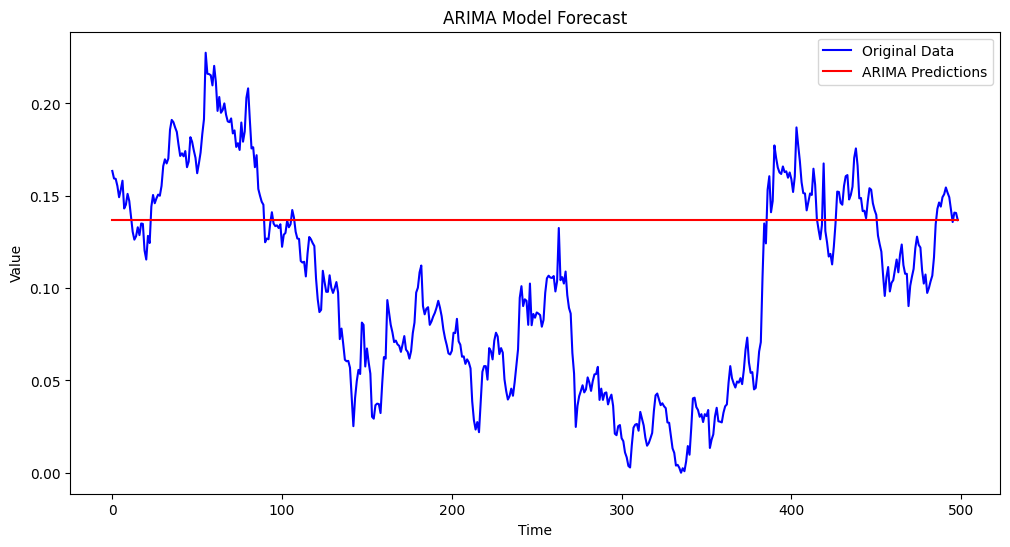

In [ ]:
data = train_data

model_autoAr = auto_arima(data, seasonal=False, stepwise=True, trace=True)

predictions = model_autoAr.predict(n_periods=len(data))

plt.figure(figsize=(12, 6))
plt.plot(data, label='Original Data', color='blue')
plt.plot(predictions, label='ARIMA Predictions', color='red')
plt.legend(loc='best')
plt.title('ARIMA Model Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()
